In [42]:
# ----------------------------------------------------------
#  TITANIC SURVIVAL PREDICTION - CODSOFT TASK-1
# ----------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ----------------------------------------------------------
# 1. LOAD DATA
# ----------------------------------------------------------

df = pd.read_csv("/content/Titanic-Dataset.csv")
print("Dataset Loaded Successfully!")
df.head()


Dataset Loaded Successfully!


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
# Drop unnecessary columns
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

# Fill missing values (Correct Format)
df.fillna({
    "Age": df["Age"].median(),
    "Embarked": df["Embarked"].mode()[0]
}, inplace=True)

# Label Encoding
label = LabelEncoder()
df["Sex"] = label.fit_transform(df["Sex"])
df["Embarked"] = label.fit_transform(df["Embarked"])

df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


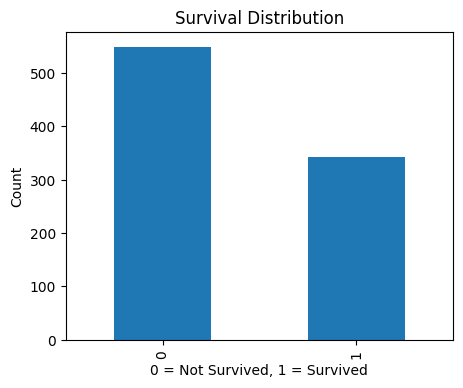

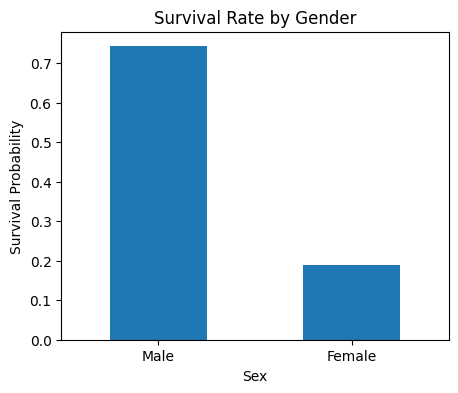

In [44]:
# Survival Distribution
plt.figure(figsize=(5,4))
df["Survived"].value_counts().plot(kind="bar")
plt.title("Survival Distribution")
plt.xlabel("0 = Not Survived, 1 = Survived")
plt.ylabel("Count")
plt.show()

# Survival by Gender
plt.figure(figsize=(5,4))
df.groupby("Sex")["Survived"].mean().plot(kind="bar")
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Probability")
plt.xticks([0,1], ["Male", "Female"], rotation=0)
plt.show()


In [45]:
# Feature Matrix (X) and Target (y)
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
 [[90 15]
 [19 55]]


In [48]:
print("\n-------------------------------")
print("     TITANIC SURVIVAL PREDICTION")
print("-------------------------------")

pclass = int(input("Enter Passenger Class (1/2/3): "))
sex_input = input("Enter Sex (male/female): ")
age = float(input("Enter Age: "))
sibsp = int(input("Enter Number of Siblings/Spouse Aboard: "))
parch = int(input("Enter Number of Parents/Children Aboard: "))
fare = float(input("Enter Fare: "))
embarked_input = input("Enter Embarked Port (S/C/Q): ")

# Convert categorical values
sex_val = 1 if sex_input.lower() == "female" else 0
embark_val = {"C": 0, "Q": 1, "S": 2}[embarked_input.upper()]

# Create dataframe with correct column names
user_df = pd.DataFrame([{
    "Pclass": pclass,
    "Sex": sex_val,
    "Age": age,
    "SibSp": sibsp,
    "Parch": parch,
    "Fare": fare,
    "Embarked": embark_val
}])

# Prediction
prediction = model.predict(user_df)[0]

# Result
if prediction == 1:
    print("\n🎉 Prediction: The passenger WOULD HAVE SURVIVED.")
else:
    print("\n❌ Prediction: The passenger WOULD NOT HAVE SURVIVED.")



-------------------------------
     TITANIC SURVIVAL PREDICTION
-------------------------------
Enter Passenger Class (1/2/3): 1
Enter Sex (male/female): male
Enter Age: 22
Enter Number of Siblings/Spouse Aboard: 1
Enter Number of Parents/Children Aboard: 2
Enter Fare: 8
Enter Embarked Port (S/C/Q): c

🎉 Prediction: The passenger WOULD HAVE SURVIVED.
